In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

VFILE = "video/trees.mp4"


In [80]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret,frame=video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

In [81]:
for f in get_frames(VFILE):
    if f is None:
        break
    cv2.imshow('frame' , f)
    # hit esc to stop
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()

In [82]:
def get_frame(filename,index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret,frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
        video.release()
        return None
    

In [83]:
#frame=get_frame(VFILE,80)
#print('shape' , frame.shape)
#print('pixel at (0,0)' , frame[0,0,:])
#plt.imshow(frame)
#print('pixel at (150,75)' , frame[150,75,:])
#plt.imshow(frame)

In [84]:
#plt.imshow(frame)

In [85]:
#fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#print('pixel at (0,0)' , fix_frame[0,0,:])
#plt.imshow(fix_frame)

In [86]:
#plt.imshow(fix_frame[240:480, 320:640])
#darker = 0.5 * fix_frame
#darker = darker.astype(np.uint8)
#plt.imshow(darker)

In [87]:
#frame=get_frame(VFILE,200)
#cv2.circle(frame,
#          center = (200,200),
#         radius=50,
#          color=(0,0,255),
#          thickness=10)
#fixed_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#plt.imshow(fixed_frame)

In [88]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,
               text=str(counter),
               org=(100,100),
               fontFace = cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    cv2.imshow('frame' , frame)
    if cv2.waitKey(10) == 27:
        break
    counter += 1
cv2.destroyAllWindows()

In [89]:
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter("new.mp4", fourcc, 20, (640,480))

counter=0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame,
               text=str(counter),
               org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    
    video_out.write(frame)
    counter += 1
video_out.release()

In [90]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('frame count', count)

frame count 480


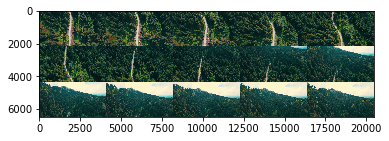

In [73]:
skip_frames = count //15
frames=[]
counter = 0

for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1

row1=np.concatenate(frames[0:5], axis=1)
row2=np.concatenate(frames[5:10], axis=1)
row3=np.concatenate(frames[10:15], axis=1)

collage=np.concatenate((row1,row2,row3), axis = 0)
collage=cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage)